# SISTEMA DE INFERENCIA BORROSA TAKAGI – SUGENO

## Ejemplo

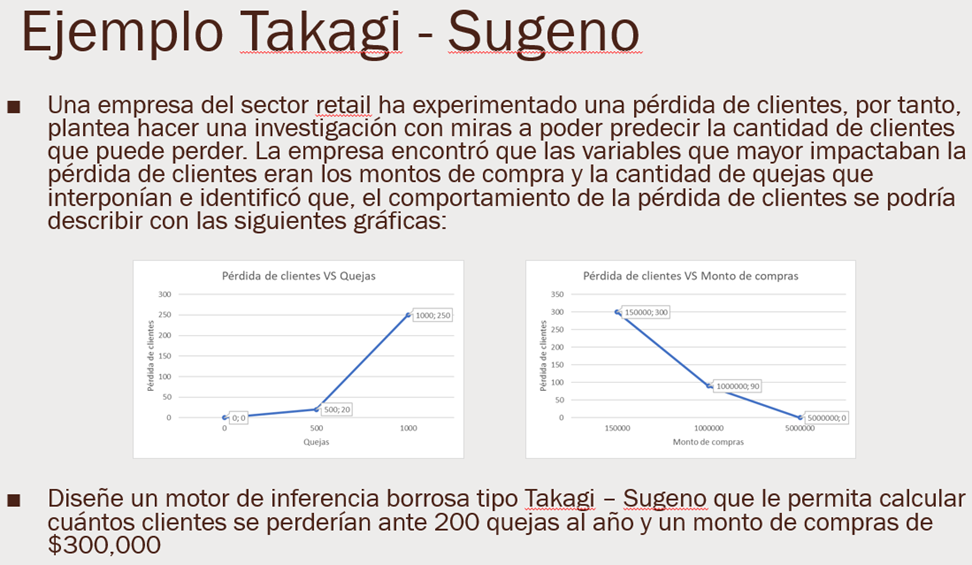

### Importar librerias

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import warnings
from scipy.stats import linregress

warnings.filterwarnings("ignore")

### 1. Visualizar los conjuntos borrosos

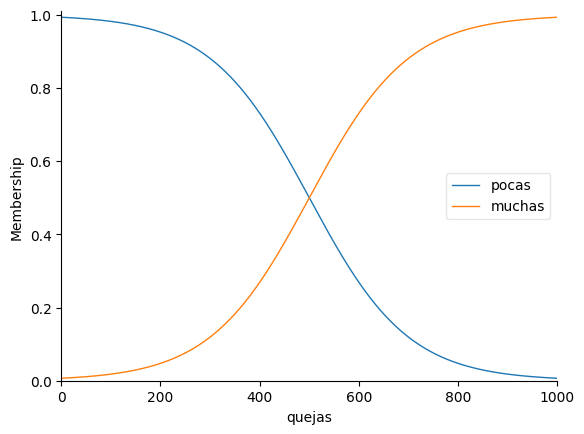

In [12]:
# Cantidad de quejas
## Universos de dircurso de fuzzificacion
quejas = ctrl.Antecedent(np.arange(0, 1001, 1), 'quejas')
quejas['pocas'] = fuzz.sigmf(quejas.universe, 500, -0.01)
quejas['muchas'] = fuzz.sigmf(quejas.universe, 500, 0.01)
quejas.view()

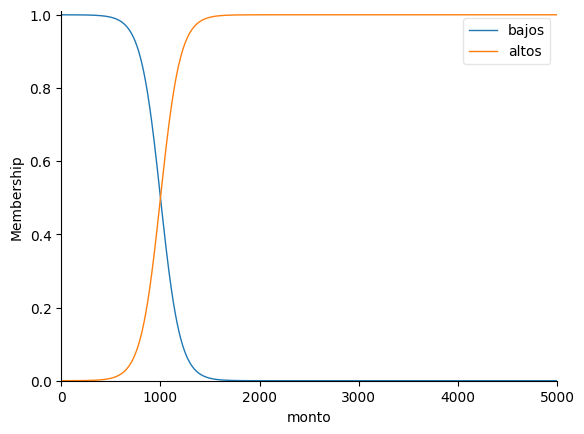

In [13]:
# Monto de compras
## Universos de dircurso y fuzzificacion
monto = ctrl.Antecedent(np.arange(0, 5001, 1), 'monto')
monto['bajos'] = fuzz.sigmf(monto.universe, 1000, -0.01)
monto['altos'] = fuzz.sigmf(monto.universe, 1000, 0.01)
monto.view()

### 2. Declarar los antecedentes para el SIB TSK

In [14]:
quejas = np.arange(0, 1001, 1)
quejas_pocas = fuzz.sigmf(quejas, 500, -0.01)
quejas_muchas = fuzz.sigmf(quejas, 500, 0.01)

monto = np.arange(0, 5001, 1)
monto_bajos = fuzz.sigmf(monto, 1000, -0.01)
monto_altos = fuzz.sigmf(monto, 1000, 0.01)

### 3. Obtener las funciones afines del consecuente

In [15]:
l1 = linregress([0, 500], [0, 20])
l2 = linregress([500, 1000], [20, 250])
l3 = linregress([150, 1000], [300, 90])
l4 = linregress([1000, 5000], [90, 0])

m1 = l1.slope
b1 = l1.intercept
m2 = l2.slope
b2 = l2.intercept
m3 = l3.slope
b3 = l3.intercept
m4 = l4.slope
b4 = l4.intercept

In [16]:
def p13 (q, m):
  return m1*q + b1 + m3*m + b3

def p14 (q, m):
  return m1*q + b1 + m4*m + b4

def p23 (q, m):
  return m2*q + b2 + m3*m + b3

def p24 (q, m):
  return m2*q + b2 + m4*m + b4

### 4. Crear la base de conocimiento

In [17]:
def regla_1 (q, m):
  mu1 = min(fuzz.interp_membership(quejas, quejas_pocas, q), fuzz.interp_membership(monto, monto_bajos, m))
  return mu1

def regla_2 (q, m):
  mu2 = min(fuzz.interp_membership(quejas, quejas_pocas, q), fuzz.interp_membership(monto, monto_altos, m))
  return mu2

def regla_3 (q, m):
  mu3 = min(fuzz.interp_membership(quejas, quejas_muchas, q), fuzz.interp_membership(monto, monto_bajos, m))
  return mu3

def regla_4 (q, m):
  mu4 = min(fuzz.interp_membership(quejas, quejas_muchas, q), fuzz.interp_membership(monto, monto_altos, m))
  return mu4

### 5. Construir el defuzzificador

In [20]:
def deffuzificador (q, m):
  r_1 = p13(q, m)
  r_2 = p14(q, m)
  r_3 = p23(q, m)
  r_4 = p24(q, m)
  print(r_1, r_2, r_3, r_4)

  mu1 = regla_1(q, m)
  mu2 = regla_2(q, m)
  mu3 = regla_3(q, m)
  mu4 = regla_4(q, m)
  print(mu1, mu2, mu3, mu4)

  num = mu1*r_1 + mu2*r_2 + mu3*r_3 + mu4*r_4
  print(num)
  den = mu1 + mu2 + mu3 + mu4
  print(den)

  return num/den

In [21]:
deffuzificador(200, 300)

270.94117647058823 113.75 144.94117647058823 -12.25
0.9525741268224334 0.0009110511944006454 0.04742587317756678 0.0009110511944006454
265.0579881464465
1.0018221023888014


np.float64(264.5759037601858)